# **LINEAR REGRESSION** UNIT 4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


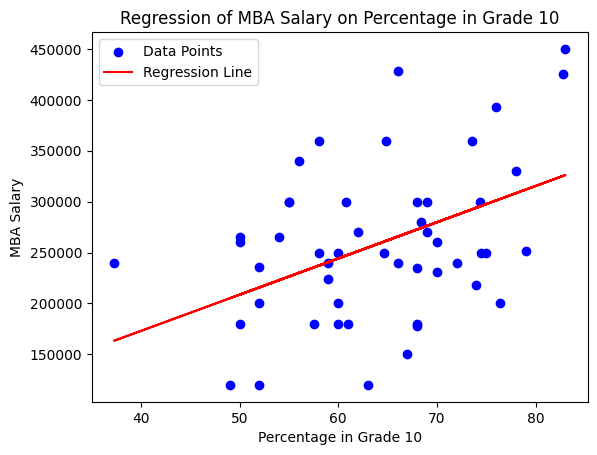

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Fri, 01 Nov 2024   Prob (F-statistic):            0.00287
Time:                        14:59:17   Log-Likelihood:                -502.43
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.05

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv('MBA Salary.csv')

# Independent and dependent variables
X = sm.add_constant(df['Percentage in Grade 10'])
Y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

# Fitting the model
mba_salary_lm = sm.OLS(y_train, X_train).fit()

print(mba_salary_lm.params)
# Get the model parameters
intercept, slope = mba_salary_lm.params

# Plot the data points
plt.scatter(df['Percentage in Grade 10'], df['Salary'], color='blue', label='Data Points')

# Plot the regression line
x_values = df['Percentage in Grade 10']
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Percentage in Grade 10')
plt.ylabel('MBA Salary')
plt.title('Regression of MBA Salary on Percentage in Grade 10')
plt.legend()

# Show the plot
plt.show()
print(mba_salary_lm.summary())

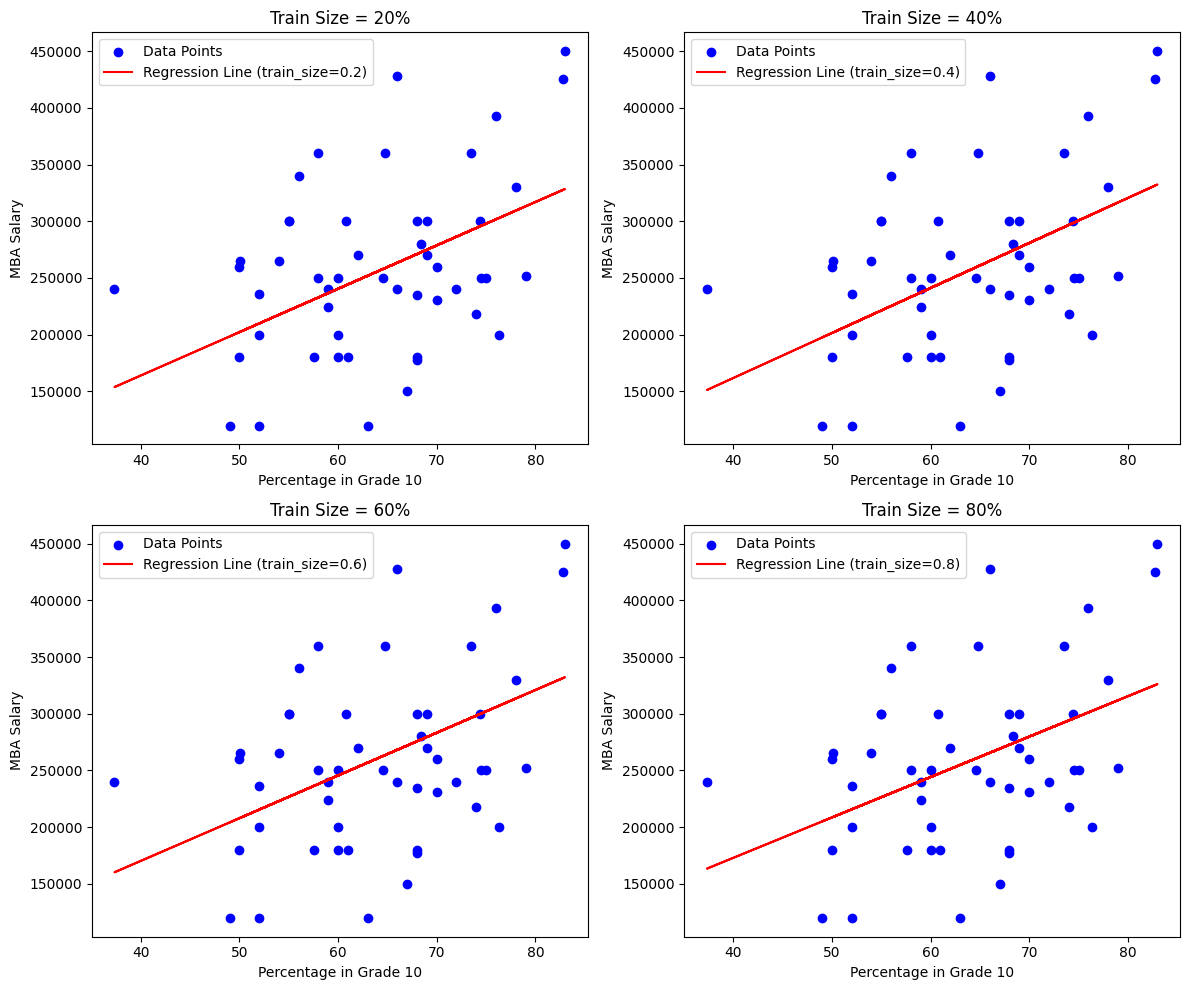

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('MBA Salary.csv')

# Independent and dependent variables
X = sm.add_constant(df['Percentage in Grade 10'])
Y = df['Salary']

# Define train sizes
train_sizes = [0.2, 0.4, 0.6, 0.8]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 subplot layout

# Loop over each train_size and create a subplot for each
for i, train_size in enumerate(train_sizes):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_size, random_state=100)

    # Fit the model
    mba_salary_lm = sm.OLS(y_train, X_train).fit()
    intercept, slope = mba_salary_lm.params

    # Select subplot
    ax = axes[i // 2, i % 2]

    # Plot data points
    ax.scatter(df['Percentage in Grade 10'], df['Salary'], color='blue', label='Data Points')

    # Plot regression line
    x_values = df['Percentage in Grade 10']
    y_values = intercept + slope * x_values
    ax.plot(x_values, y_values, color='red', label=f'Regression Line (train_size={train_size})')

    # Set labels and title
    ax.set_xlabel('Percentage in Grade 10')
    ax.set_ylabel('MBA Salary')
    ax.set_title(f'Train Size = {train_size * 100:.0f}%')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv('MBA Salary.csv')

# Step 2: Set up the data and add a constant for intercept calculation
X = sm.add_constant(df['Percentage in Grade 10'])
Y = df['Salary']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

# Step 4: Fit the model using OLS (Ordinary Least Squares)
mba_salary_lm = sm.OLS(y_train, X_train).fit()

# Step 5: Retrieve model parameters (intercept and slope)
intercept = mba_salary_lm.params['const']
slope = mba_salary_lm.params['Percentage in Grade 10']
print(intercept, slope)


# Step 6: Take Percentage in Grade 10 as user input
percentage_in_grade_10 = float(input("Enter Percentage in Grade 10: "))

# Step 7: Predict the salary using the trained model's equation
predicted_salary = intercept + (slope * percentage_in_grade_10)

print(f"Predicted Salary for Percentage in Grade 10 = {percentage_in_grade_10}%: {predicted_salary:.2f} monthly ")


30587.285651523373 3560.587382863203
Enter Percentage in Grade 10: 78
Predicted Salary for Percentage in Grade 10 = 78.0%: 308313.10 monthly 


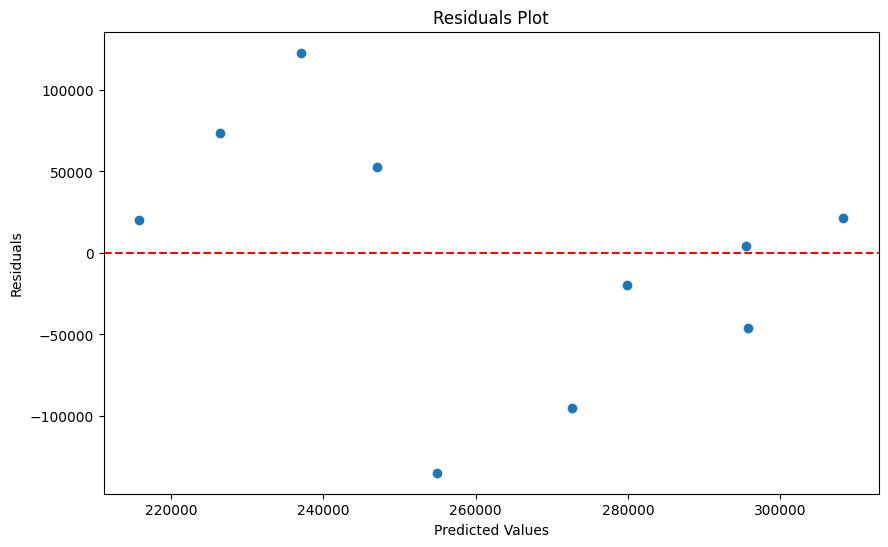

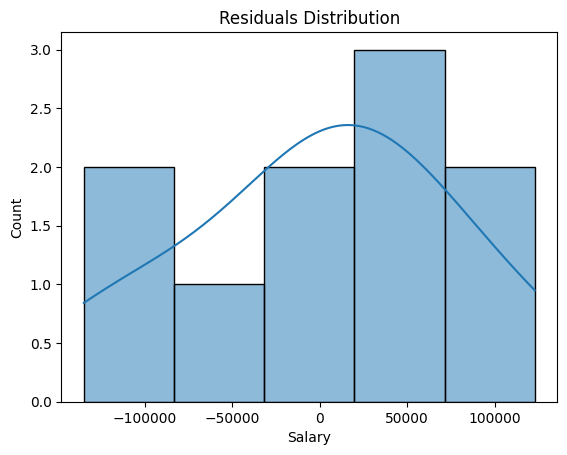

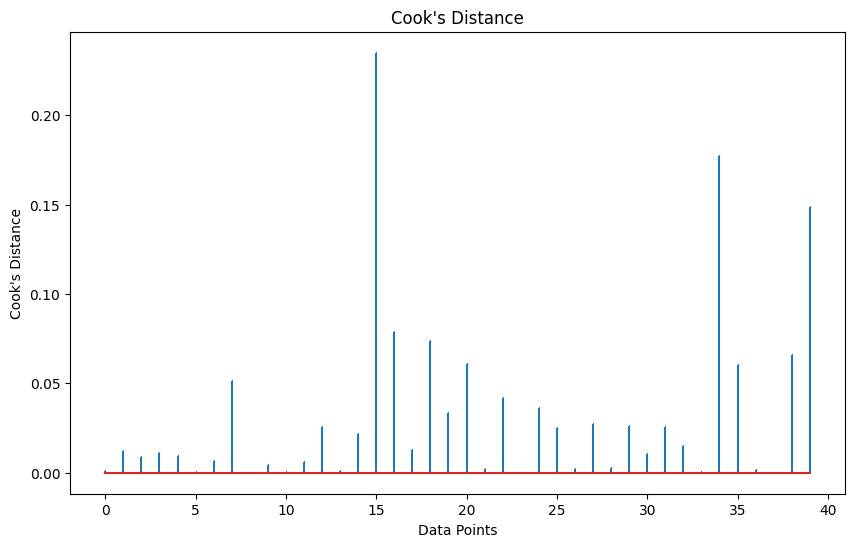

Mean Squared Error: 5396084152.419214


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming X_train, y_train, X_test, y_test, and df are predefined
# 1. Fitting the Linear Regression model using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# 2. Residuals Calculation
residuals = y_test - y_pred

# 3. Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 4. Checking for Normality of Residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# 5. Outlier Detection using Cook's Distance
# Using statsmodels OLS for Cook's Distance calculation
# Add constant term to the independent variables for OLS
X_train_ols = add_constant(X_train)
ols_model = OLS(y_train, X_train_ols).fit()  # OLS fitting

# Get influence measures
influence = OLSInfluence(ols_model)
cooks_d = influence.cooks_distance[0]

# Plotting Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel('Data Points')
plt.ylabel("Cook's Distance")
plt.show()

# 6. Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


The most common data science interview questions which are mainly asked is write the code of linear regression from scratch without using scikit learn.

This question is important because interviewer wants to check your

- Understanding of regression fundamentals
- Applied mathematics knowledge (Normal equation solution is provided just need to implement it on code)
- Algorithm design
- OOP and class-level coding
- Numerical computing concepts

Codes credits goes to the respective owner shared for educational purposes only.

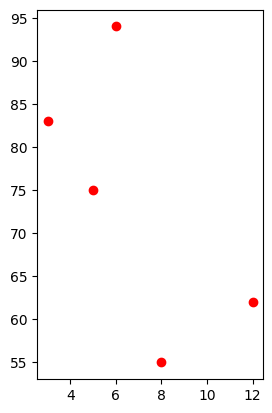

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Make predictions and calculate R-squared:  [79.07692308 58.55555556 84.94017094 76.14529915 70.28205128]
Printing the Rsquare model:  0.4075991116931533


In [ ]:
import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self):
    self.intercept = None
    self.coefficients= None

  def fit(self, X, y):
    ones= np.ones((len(X), 1))
    X=np.concatenate((ones, X),axis=1)
    print(ones)
#Calculating the normal equation
    XT= X.T
    XTX= XT.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    XTy= XT.dot(y)
    self.coefficients = XTX_inv.dot(XTy)

  def predict(self, X):
    #Add a column of ones to match the structure ued in fitting the model
    ones = np.ones((len(X),1))
    X= np.concatenate((ones, X), axis=1)

    #Use the calculated coefficients to make predictions
    return X.dot(self.coefficients)

  def Rsquared(self, X, y):
    yprep = self.predict(X)
    ss_total = np.sum((y-np.mean(y))**2) # Total sum of square
    ss_residual = np.sum((y-yprep)**2) # Residual sum of square
    return 1- (ss_residual/ss_total) #R-square formula


import numpy as np
# #Sample data
# X= np.array([[1], [2], [3], [4], [5]])
# y= np.array([1,2,3,4,5])
# plt.subplot(1,2,1)
# plt.scatter(X,y, color='red')
# plt.show()
#Initialize and fit the model


X = np.array([[5], [12], [3], [6], [8]])  # Input (Hours studied)
y = np.array([75, 62, 83, 94, 55])            # Output (Exam scores)

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red')  # Plotting the data points
plt.show()


model = LinearRegression()
model.fit(X,y)
model.predict(np.array([[5], [12], [3], [6], [8]]) )
#Make predictions and calculate R-squared
yprep= model.predict(X)
print("Make predictions and calculate R-squared: ", yprep)

print("Printing the Rsquare model: " ,model.Rsquared(X,y))




               sum_sq   df          F    PR(>F)
Hours     2185.663608  1.0  24.347352  0.001143
Residual   718.160599  8.0        NaN       NaN


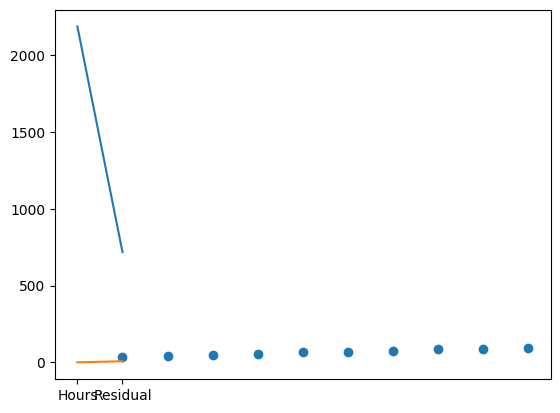

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Original data (Hours studied and Scores)
np.random.seed(0)
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores = np.array([35, 40, 50, 55, 65, 70, 75, 85, 90, 95])

# Adding random noise to Scores to reduce significance
noise = np.random.normal(0, 10, size=scores.shape)  # Adding random noise (mean=0, std=10)
scores_with_noise = scores + noise

# Creating a DataFrame
df_noise = pd.DataFrame({'Hours': hours, 'Scores': scores_with_noise})

# Fit the model with noisy data
model_noise = ols('Scores ~ Hours', data=df_noise).fit()

# Perform ANOVA
anova_table_noise = sm.stats.anova_lm(model_noise, typ=2)
print(anova_table_noise)

plt.plot(anova_table_noise)
plt.scatter(hours, scores)

plt.show()

Conclusion:
You can reduce the significance of your model by:

Adding random noise to the data.
Using a smaller sample size.
Replacing the meaningful independent variable with something random.
Adding higher levels of noise to the dependent variable.
All of these methods reduce the F-statistic and increase the p-value, making the model less significant and less likely to predict the dependent variable accurately.

Let me know if you need help with any of these examples or explanations!








# Perform Breusch-Pagan test:
Yeh ek statistical test hai jo specifically heteroscedasticity ko detect karta hai.
Agar test ka result significant aata hai (p-value chhoti hoti hai), to aapke model mein heteroscedasticity hai.

#Model  Diagnosis
Check for normal distribution of residual

Text(0.5, 1.0, 'Normal P-P plot')

<Figure size 1000x600 with 0 Axes>

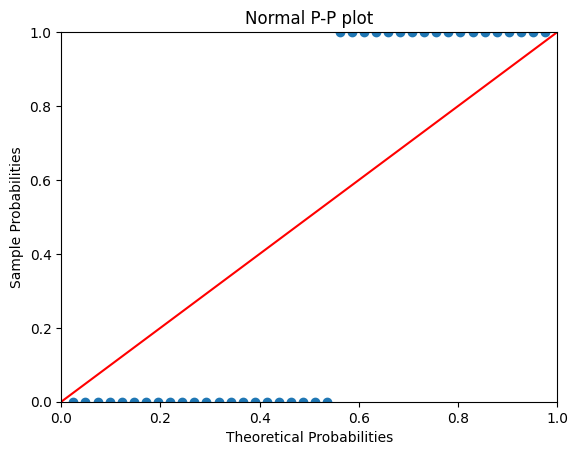

In [ ]:
plt.figure(figsize=(10, 6))
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot(mba_salary_resid)
probplot.ppplot(line='45')
plt.title('Normal P-P plot')

# **CHAPTER 5: CLASSIFICATION PROBLEMS**

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# Data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combine X and y into a single DataFrame (optional)
data = pd.concat([X, y], axis=1)

# Save to CSV
data.to_csv('german_credit_data.csv', index=False)

# Verify if file is saved and accessible in Colab
!ls -l german_credit_data.csv



-rw-r--r-- 1 root root 80030 Nov  1 14:59 german_credit_data.csv


In [ ]:
credit_df=pd.read_csv('/content/German Credit Data.csv')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [ ]:
credit_df.iloc[0:5, 1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [ ]:
credit_df.iloc[0:5, 7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [ ]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [ ]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True)
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2,12,2096,2,3,49,1,False,False,True,False,...,True,False,False,True,False,False,True,True,False,False
3,42,7882,2,4,45,1,False,False,False,False,...,True,False,False,True,False,False,True,False,True,False
4,24,4870,3,4,53,2,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,False,False,True,False,...,True,False,True,False,False,False,True,True,False,False
996,30,3857,4,4,40,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
997,12,804,4,4,38,1,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
998,45,1845,4,4,23,1,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [ ]:
import statsmodels.api as sm

Y= credit_df.status
X= sm.add_constant(encoded_credit_df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

In [ ]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [ ]:
def get_significant_vars(lm):
  #store the p-values and correspondingcolumn names in a dataframe
  var_p_vals_df = pf.DataFrame(lm.pvalues)
  var_p_vals_df['vars']=var_p_vals_df.index
  var_p_vals_df.columns = ['pvals', 'vars']

  #filter the column names where p-value is less than 0.05
  return list(var_p_vals_df[var_p_vals_df.pvals<0.05]['vars'])

# **LOADING AND PREPARING DATASET**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [ ]:
df = pd.read_csv('bank.csv')


In [ ]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB
None
   age          job  marital  education default  balance housing-loan  \
0   30   unemployed  married    primary      no     1787           no   
1   33     services  married  secondary      no     4789          yes   
2   35

In [ ]:
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes,subscribed_yes
0,30,1787,1,0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,33,4789,1,4,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False
2,35,1350,1,1,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
3,30,1476,4,0,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,True,False
4,59,0,1,0,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,5,0,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
4517,57,-3313,1,0,False,False,False,False,False,True,...,False,True,False,False,True,False,True,True,True,False
4518,57,295,11,0,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
4519,28,1137,4,3,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [ ]:
X = df.drop('age', axis=1)  # Replace 'target_column_name' with the actual column name for the target
y = df['duration']  # Replace 'target_column_name' with the actual column name


KeyError: 'duration'

In [ ]:
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()
print(result.summary2())

In [ ]:
X = pd.get_dummies(X, drop_first=True)
print(X.dtypes)

In [ ]:
print(X.isnull().sum())  # Check for missing values
X = X.dropna()

In [ ]:
X_bank = X.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})
X_bank

In [ ]:
print(X_bank.dtypes)  # Check data types of all columns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Data
df = pd.read_csv('banking.csv')

# Inspect and Clean the Data
print(df.info())
print(df.head())

# Convert Boolean Columns to Integers
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

# Handle Categorical Variables
df = pd.get_dummies(df, drop_first=True)

# Separate Features (X) and Target (y)
target_column_name = 'target_column_name'  # Replace with the actual column name for the target
X = df.drop('age', axis=1)
y = df['duration']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make Predictions
y_pred = linear_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Results
print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/country.csv')
df

In [ ]:
df.dropna()

In [ ]:
df.dtypes

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('country.csv')

# Check for any missing values in 'Gini Index' and 'Corruption' columns and drop them
data = data[['Gini_Index', 'Corruption_Index']].dropna()

# Define X and y
X = data[['Gini_Index']]  # Independent variable
y = data['Corruption_Index']    # Dependent variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient for Gini Index:", model.coef_[0])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the regression line with the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Gini Index')
plt.ylabel('Corruption')
plt.title('Simple Linear Regression: Gini Index vs. Corruption')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api  as sm

# Load the data from the CSV file
data = pd.read_csv('country.csv')

# Check for any missing values in 'Gini Index' and 'Corruption' columns and drop them
data = data[['Gini_Index', 'Corruption_Index']].dropna()

# Define X and y
X = data[['Gini_Index']]  # Independent variable
y = data['Corruption_Index']    # Dependent variable

#Adding a constant to the feature
X_= sm.add_constant(X)
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

modell = sm.OLS(y,X_).fit()
print("The pvalue is:", modell.pvalues)
print('='*50)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Model 95% confidence level
confidence_interval = modell.conf_int(alpha=0.05)
print("95% Confidence Interval for coefficients:", confidence_interval)

print('='*50)


# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient for Gini Index:", model.coef_[0])

print('='*50)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print('='*50)
# Plot the regression line with the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Gini Index')
plt.ylabel('Corruption')
plt.title('Simple Linear Regression: Gini Index vs. Corruption')
plt.legend()
plt.show()


# **GRADIENT DESCENT**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])  # Input features
y = np.array([2, 4, 6, 8, 10 ,12, 14, 16,18])  # Output labels (y = 2x)

# Hyperparameters
alpha = 0.01  # Learning rate
n_iterations = 1000  # Number of iterations
m = len(y)  # Number of training examples

# Initial parameters
theta = 0  # Starting weight
b = 0  # Starting bias

# Cost function to calculate the mean squared error
def compute_cost(X, y, theta, b):
    return (1/(2*m)) * np.sum((theta * X + b - y) ** 2)

# Gradient Descent
for i in range(n_iterations):
    # Predictions
    y_pred = theta * X + b

    # Calculate gradients
    d_theta = (1/m) * np.sum((y_pred - y) * X)  # Gradient w.r.t. theta
    d_b = (1/m) * np.sum(y_pred - y)  # Gradient w.r.t. b

    # Update parameters
    theta -= alpha * d_theta  # Update theta
    b -= alpha * d_b  # Update bias

    # (Optional) Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {compute_cost(X, y, theta, b)}")

# Final parameters
print(f"Final weight (theta): {theta}, Final bias (b): {b}")
compute_cost(X,y , 0, 0)
print(compute_cost)
# Plotting
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X, theta * X + b, label='Fitted Line', color='blue')
plt.legend()
plt.show()


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sales_df = pd.read_csv('Advertising.csv')
# Printing first few records
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

In [6]:
Y = np.array( (Y - Y.mean() ) / Y.std() )
X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(),axis = 0 )

Method 1: Random Initialization of the Bias and Weights

In [8]:
import random
#dim - is the number of weights to be initialized besides the bias
def initialize( dim ):
  # For reproducible results, the seed it set to 42.
  # Reader can comment the following two lines
  # and try other initialiazation values.
  np.random.seed(seed=42)
  random.seed(42)
  #Initialize the bias.
  b = random.random()
  #Initialize the weights.
  w = np.random.rand( dim )
  return b, w

In [10]:
b, w = initialize( 3 )
print( "Bias: ", b, " Weights: ", w )

Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]


Method 2: Predict Y Values from the Bias and Weights

In [12]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix
def predict_Y( b, w, X ):
  return b + np.matmul( X, w )

In [13]:
b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
Y_hat[0:10]

,0
0,3.231496
1,1.707849
2,2.824761
3,2.753090
4,0.924486
5,3.171365
6,0.622344
7,-0.349354
8,-2.313095
9,-0.768030


Method 3: Calculate the Cost Function — MSE

In [15]:
import math
# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost( Y, Y_hat ):
  # Calculating the residuals - difference between actual and
  # predicted values
  Y_resid = Y - Y_hat
  # Matrix multiplication with self will give the square values
  # Then take the sum and divide by number of examples to
  # calculate mean
  return np.sum( np.matmul( Y_resid.T, Y_resid ) ) / len( Y_resid )

In [16]:
b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
get_cost( Y, Y_hat )

1.5303100198505897

Method 4: Update the Bias and Weights

In [18]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):
  #gradient of bias
  db = (np.sum( y_hat - y ) * 2) / len(y)
  #gradient of weights
  dw = (np.dot( ( y_hat - y ), x ) * 2 ) / len(y)
  #update bias
  b_1 = b_0 - learning_rate * db
  #update beta
  w_1 = w_0 - learning_rate * dw
  #return the new bias and beta values
  return b_1, w_1

In [20]:
b, w = initialize( 3 )
print( "After Initialization - Bias: ", b, " Weights: ", w )
Y_hat = predict_Y( b, w, X)
b, w = update_beta( X, Y, Y_hat, b, w, 0.01 )
print( "After first update - Bias: ", b, " Weights: ", w )

After Initialization - Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261  Weights:  [0.38079093 0.9376953  0.71484883]


6.2.1.5 Finding the Optimal Bias and Weights

In [35]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):
    # Initialize the bias and weights
    b, w = initialize(X.shape[1])
    # Create a DataFrame to track the cost
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])

    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calculate predicted value of y
        Y_hat = predict_Y(b, w, X)
        # Calculate the cost
        this_cost = get_cost(Y, Y_hat)
        # Update and calculate the new values of bias and weights
        b, w = update_beta(X, Y, Y_hat, b, w, alpha)

        # Store the cost for every iteration
        gd_iterations_df.loc[each_iter] = [each_iter, this_cost]

    print("Final estimate of b and w:", b, w)
    return gd_iterations_df, b, w


In [36]:
gd_iterations_df, b, w = run_gradient_descent( X, Y, alpha =
0.001, num_iterations = 200 )

Final estimate of b and w: 0.4284489581739146 [0.48270238 0.75265969 0.46109174]


In [37]:
gd_iterations_df

,iteration,cost
0,0.0,1.530310
1,1.0,1.523657
2,2.0,1.517037
3,3.0,1.510448
4,4.0,1.503890
...,...,...
195,195.0,0.684001
196,196.0,0.681366
197,197.0,0.678744
198,198.0,0.676133


6.2.1.6 Plotting the Cost Function against the Iterations

In [38]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Final estimates of b and w: 0.4284489581739146 [0.48270238 0.75265969 0.46109174]


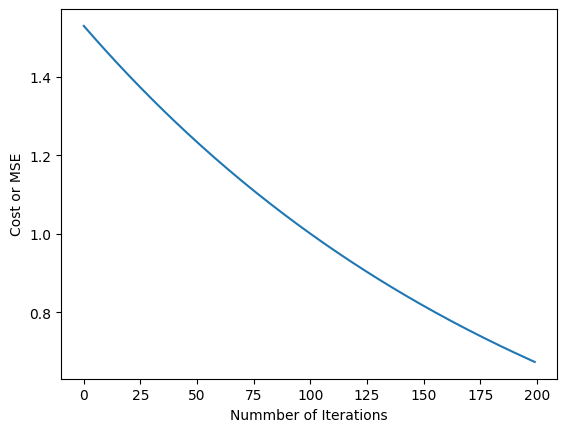

In [39]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost']);
plt.xlabel('Nummber of Iterations')
plt.ylabel('Cost or MSE')
print("Final estimates of b and w:", b, w)
plt.show()

Final estimate of b and w: -5.568727901296403e-17 [ 0.75306591  0.53648155 -0.00433069]
Final estimate of b and w: 0.01166469555693021 [0.74315125 0.52779959 0.01171703]


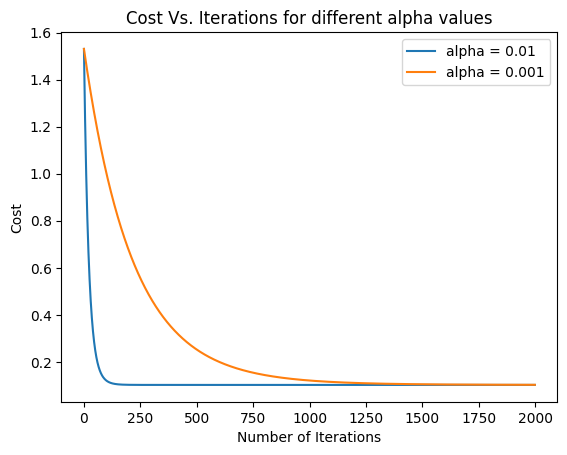

In [41]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha = 0.01, num_iterations = 2000)
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha = 0.001, num_iterations = 2000)
plt.plot( alpha_df_1['iteration'], alpha_df_1['cost'], label = 'alpha = 0.01' );
plt.plot( alpha_df_2['iteration'], alpha_df_2['cost'], label = 'alpha = 0.001');
plt.legend()
plt.ylabel('Cost');
plt.xlabel('Number of Iterations');
plt.title('Cost Vs. Iterations for different alpha values');

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales_df[["TV", "Radio", "Newspaper"]], sales_df.Sales,  test_size=0.2, random_state=42)


In [43]:
len(X_train)

160

In [44]:
len(X_test)

40

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#initializing the model
linreg = LinearRegression()
#fitting the model
linreg.fit(X_train, y_train)

LinearRegression()

In [47]:
linreg.intercept_

2.979067338122629

In [49]:
linreg.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [50]:
list(zip(["TV", "Radio", "Newspaper"], list(linreg.coef_)))

[('TV', 0.044729517468716326),
 ('Radio', 0.18919505423437652),
 ('Newspaper', 0.0027611143413671935)]

Making Prediction on Test Set

In [51]:
#Predecting the y value from te test set
y_pred = linreg.predict(X_test)

In [52]:
#creating Dataframe with 3 columns named: actual, predicted and residuals
#to store the respective values
test_pred_df= pd.Dataframe({'actual': y_test, 'predicted': y_pred, 'residuals': y_test - y_pred})